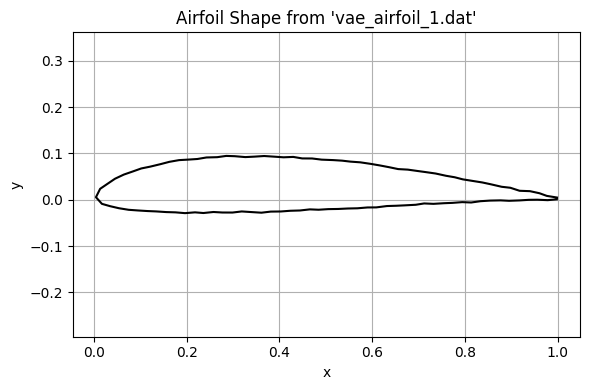

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_airfoil(dat_path):
    """
    Reads an airfoil .dat file (x–y coordinates) and plots its shape.
    Supports files with or without a header line.
    """
    if not os.path.isfile(dat_path):
        raise FileNotFoundError(f"No such file: {dat_path}")

    # Try to load, skipping a possible header line if it isn’t numeric
    try:
        # First attempt: assume first row is a header (e.g. “NACA2412”)
        data = np.loadtxt(dat_path, skiprows=1)
        # If that succeeded but the first row was not numeric, data will have two columns
        if data.ndim != 2 or data.shape[1] < 2:
            raise ValueError
    except (ValueError, IndexError):
        # Fallback: load everything as numeric
        data = np.loadtxt(dat_path)
    x, y = data[:, 0], data[:, 1]

    plt.figure(figsize=(6, 4))
    plt.plot(x, y, "k-", linewidth=1.5)
    plt.axis("equal")
    plt.title(f"Airfoil Shape from '{os.path.basename(dat_path)}'")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    import sys

    if len(sys.argv) != 2:
        print("Usage: python plot_airfoil.py <path_to_airfoil.dat>")
        sys.exit(1)

    dat_file = '/home/subuyazem/Desktop/MEO/airfoil_design/airfoil_transformers/generated_airfoils/vae_airfoil_1.dat'
    plot_airfoil(dat_file)


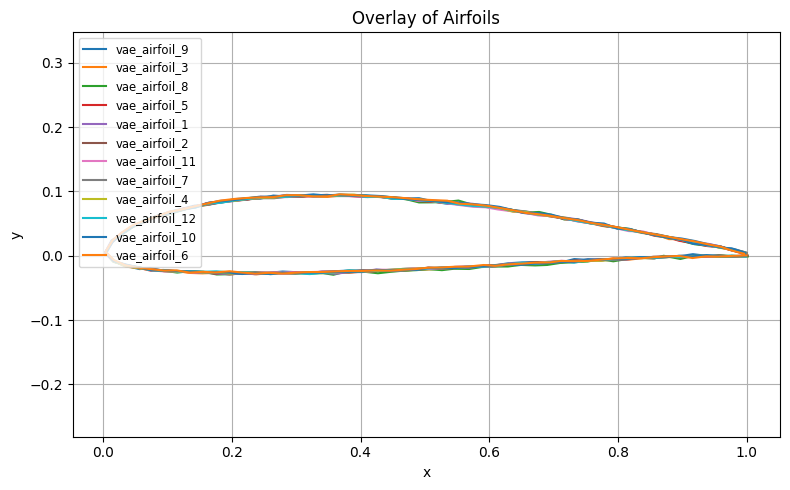

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

def load_airfoil_coords(dat_path):
    """Load airfoil coordinates from a .dat file."""
    try:
        data = np.loadtxt(dat_path, skiprows=1)
        if data.shape[1] < 2:
            raise ValueError
    except Exception:
        data = np.loadtxt(dat_path)
    return data[:, 0], data[:, 1]

def plot_airfoils_from_folder(folder_path):
    """Plot all airfoils from .dat files in a folder."""
    dat_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.dat')]
    if not dat_files:
        print("No .dat files found in the folder.")
        return

    plt.figure(figsize=(8, 5))

    for filename in dat_files:
        full_path = os.path.join(folder_path, filename)
        try:
            x, y = load_airfoil_coords(full_path)
            plt.plot(x, y, label=os.path.splitext(filename)[0])
        except Exception as e:
            print(f"Failed to plot {filename}: {e}")

    plt.title("Overlay of Airfoils")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")
    plt.grid(True)
    plt.legend(fontsize="small", loc="best")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Set your airfoil folder path here
    folder = "generated_airfoils"  # or any path like "./data/airfoil_shapes/"
    plot_airfoils_from_folder(folder)
